In [1]:
# Cell 1: Import Libraries  
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from collections import Counter  
import warnings  
warnings.filterwarnings('ignore')  

np.random.seed(42)  

# Configuration  
DATA_PATH = r"D:\data\data original"  
OUTPUT_DIR = r"D:\data mining\appendix"  
os.makedirs(OUTPUT_DIR, exist_ok=True)  

print("Environment setup complete")  
print(f"Data path: {DATA_PATH}")  
print(f"Output path: {OUTPUT_DIR}")

Environment setup complete
Data path: D:\data\data original
Output path: D:\data mining\appendix


In [2]:
import torch  
from torchvision import datasets, transforms  
from torch.utils.data import DataLoader  

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'  
print(f"Device: {DEVICE}")  

transform = transforms.Compose([  
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])  

dataset = datasets.ImageFolder(root=DATA_PATH, transform=transform)  
dataloader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=4)  

class_names = dataset.classes  
print(f"Classes: {class_names}")  
print(f"Total images: {len(dataset)}")

Device: cpu
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Total images: 2527


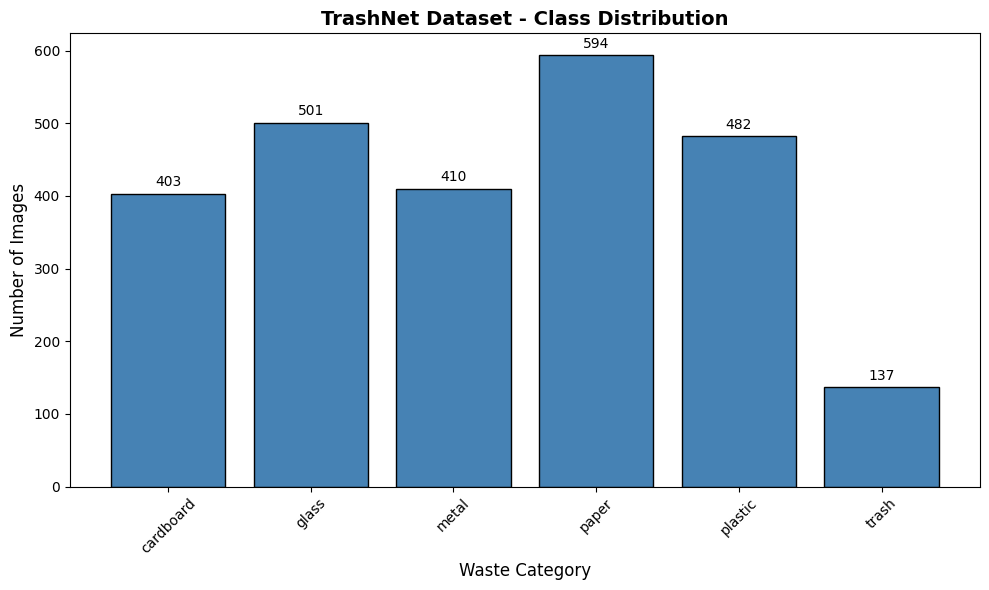


Class distribution:
  cardboard: 403
  glass: 501
  metal: 410
  paper: 594
  plastic: 482
  trash: 137


In [3]:
# Cell 3: Class Distribution Analysis  
class_counts = Counter([label for _, label in dataset.samples])  

plt.figure(figsize=(10, 6))  
plt.bar(class_names, [class_counts[i] for i in range(len(class_names))],   
        color='steelblue', edgecolor='black')  
plt.title('TrashNet Dataset - Class Distribution', fontsize=14, fontweight='bold')  
plt.xlabel('Waste Category', fontsize=12)  
plt.ylabel('Number of Images', fontsize=12)  
plt.xticks(rotation=45)  

for i, count in enumerate([class_counts[i] for i in range(len(class_names))]):  
    plt.text(i, count + 10, str(count), ha='center', fontsize=10)  

plt.tight_layout()  
plt.savefig(f'{OUTPUT_DIR}/01_class_distribution.png', dpi=300, bbox_inches='tight')  
plt.show()  

print("\nClass distribution:")  
for i, name in enumerate(class_names):  
    print(f"  {name}: {class_counts[i]}")  


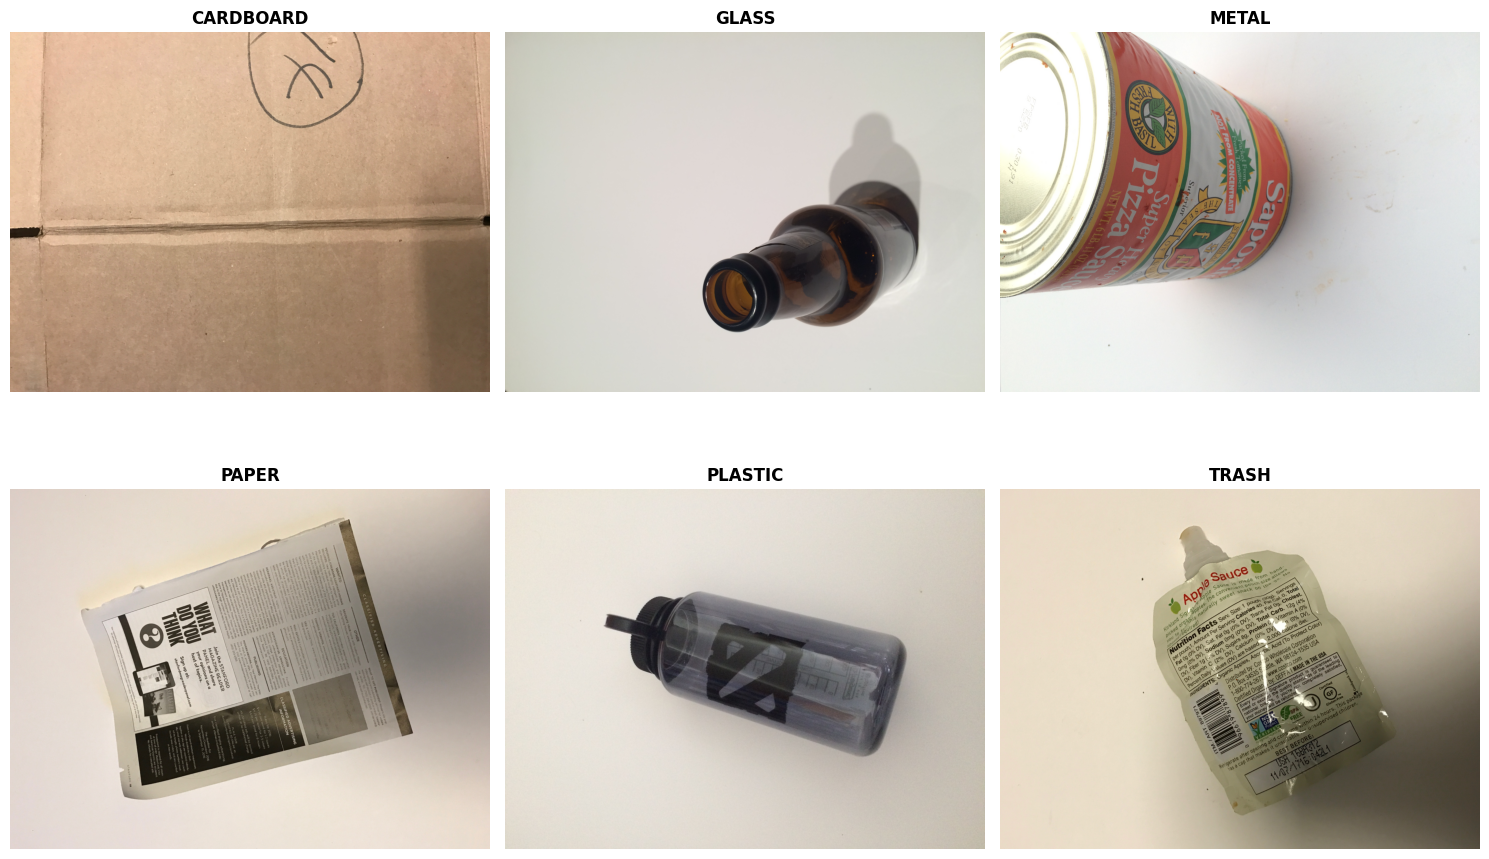

In [4]:
# Cell 4: Sample Images Visualization  
from PIL import Image  

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
axes = axes.flatten()  

for idx, class_name in enumerate(class_names):  
    class_path = os.path.join(DATA_PATH, class_name)  
    sample_img = os.listdir(class_path)[0]  
    img_path = os.path.join(class_path, sample_img)  
    
    img = Image.open(img_path)  
    axes[idx].imshow(img)  
    axes[idx].set_title(f'{class_name.upper()}', fontsize=12, fontweight='bold')  
    axes[idx].axis('off')  

plt.tight_layout()  
plt.savefig(f'{OUTPUT_DIR}/01_sample_images.png', dpi=300, bbox_inches='tight')  
plt.show()  
